Probability distribution

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
uniform_data = stats.uniform.rvs(size=100000,  # Generate 100000 numbers
                                 loc = 0,      # From 0 
                                 scale=10)     # To 10

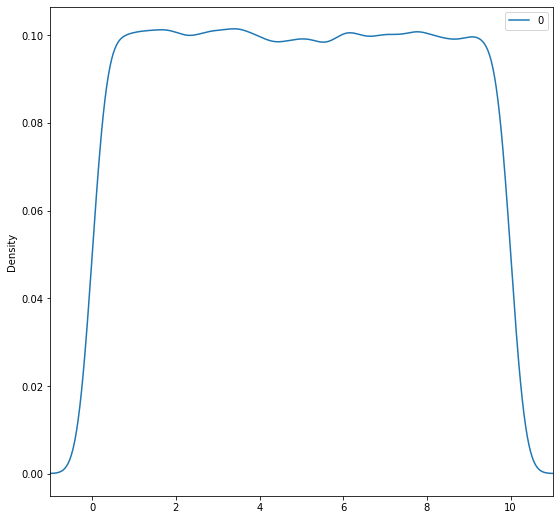

In [4]:
pd.DataFrame(uniform_data).plot(kind="density",  # Plot the distribution
                               figsize=(9,9),
                               xlim=(-1,11));

stats.distribution.cdf() is used to determine the probability that an observation drawn from a distribution falls below a specified value (known as the cumulative distribution function). In essence, cdf() gives you the area under the distribution's density curve to the left of a certain value on the x axis. For example, in the uniform distribution above, there is a 25% chance that an observation will be in the range 0 to 2.5 and a 75% chance it will fall in the range 2.5 to 10. We can confirm this with cdf():

In [5]:
stats.uniform.cdf(x=2.5,         # Cutoff value (quantile) to check
                  loc=0,         # Distribution start
                  scale=10)  

0.25

-stats.distribution.ppf() is the inverse of cdf(): it returns the x axis cutoff value (quantile) associated with a given probability. For instance, if we want to know the cutoff value for which we have a 40% chance of drawing an observation below that value, we can use ppf():

In [6]:
stats.uniform.ppf(q=0.4,         # Probability cutoff
                  loc=0,         # Distribution start
                  scale=10) 

4.0

-stats.distribution.pdf() gives you the probability density (height of the distribution) at a given x value. Since the uniform distribution is flat, all x values within its range will have the same probability density and x values outside the range have a probability density of 0:

In [7]:
for x in range(-1,12,3):
    print("Density at x value " + str(x))
    print( stats.uniform.pdf(x, loc=0, scale=10) )   

Density at x value -1
0.0
Density at x value 2
0.1
Density at x value 5
0.1
Density at x value 8
0.1
Density at x value 11
0.0


Probability distribution functions in scipy also support median(), mean(), var() and std().

Generating Random Numbers and Setting The Seed

In [8]:
import random

random.randint(0,10)   

10

In [9]:
random.choice([2,4,6,9]) 

2

In [10]:
random.random()   

0.05097600185232609

In [11]:
random.uniform(0,10) 

2.379552829279631

In [12]:
random.seed(12)  # Set the seed to an arbitrary value

print([random.uniform(0,10) for x in range(4)])

random.seed(12)  # Set the seed to the same value

print([random.uniform(0,10) for x in range(4)])

[4.7457067868854805, 6.574725026572553, 6.664104711248381, 1.4260035292536777]
[4.7457067868854805, 6.574725026572553, 6.664104711248381, 1.4260035292536777]


The Normal Distribution

The normal or Gaussian distribution is a continuous probability distribution characterized by a symmetric bell-shaped curve.

In [13]:
prob_under_minus1 = stats.norm.cdf(x= -1,  
                                loc = 0,               
                                scale= 1)     

prob_over_1 = 1 - stats.norm.cdf(x= 1,  
                                loc = 0,               
                                scale= 1) 

between_prob = 1-(prob_under_minus1+prob_over_1)

print(prob_under_minus1, prob_over_1, between_prob)

0.15865525393145707 0.15865525393145707 0.6826894921370859


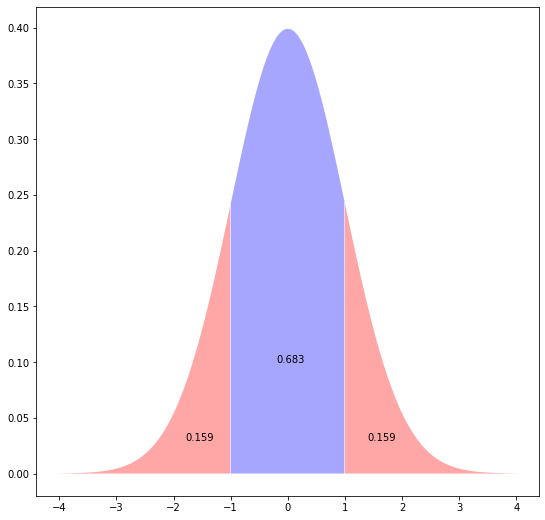

In [14]:
# Plot normal distribution areas*

plt.rcParams["figure.figsize"] = (9,9)
                                  
plt.fill_between(x=np.arange(-4,-1,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-1,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,4,0.01), 
                 y1= stats.norm.pdf(np.arange(1,4,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-1,1,0.01), 
                 y1= stats.norm.pdf(np.arange(-1,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.text(x=-1.8, y=0.03, s= round(prob_under_minus1,3))
plt.text(x=-0.2, y=0.1, s= round(between_prob,3))
plt.text(x=1.4, y=0.03, s= round(prob_over_1,3));

Finding quantiles of the normal distribution is a common task when performing statistical tests. You can check normal distribution quantiles with stats.norm.ppf():

In [15]:
print( stats.norm.ppf(q=0.025) ) # Find the quantile for the 2.5% cutoff

print( stats.norm.ppf(q=0.975) ) # Find the quantile for the 97.5% cutoff

-1.9599639845400545
1.959963984540054


col_0   0   1    2     3     4     5     6     7    8    9   10
row_0                                                          
counts  10  95  481  1188  2035  2452  2028  1167  438  102   4


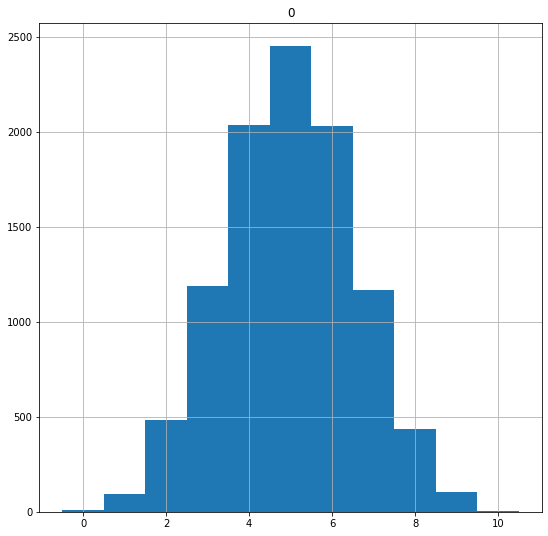

In [16]:
fair_coin_flips = stats.binom.rvs(n=10,        # Number of flips per trial
                                  p=0.5,       # Success probability
                                  size=10000)  # Number of trials

print( pd.crosstab(index="counts", columns= fair_coin_flips))

pd.DataFrame(fair_coin_flips).hist(range=(-0.5,10.5), bins=11);

col_0   3   4    5    6     7     8     9     10
row_0                                           
counts  11  51  274  896  2013  2966  2729  1060


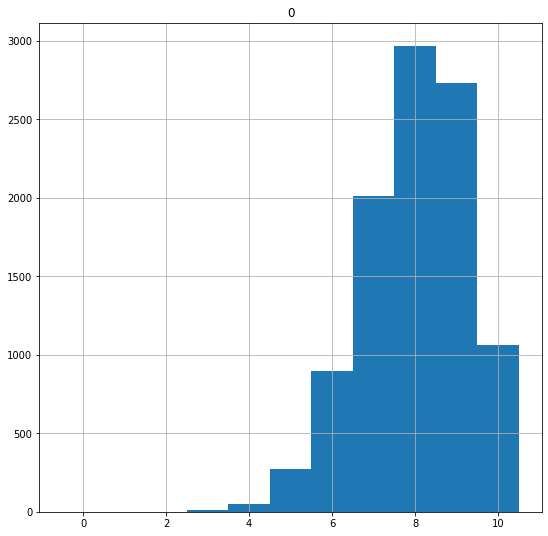

In [17]:
biased_coin_flips = stats.binom.rvs(n=10,      # Number of flips per trial
                                  p=0.8,       # Success probability
                                  size=10000)  # Number of trials

# Print table of counts
print( pd.crosstab(index="counts", columns= biased_coin_flips))

# Plot histogram
pd.DataFrame(biased_coin_flips).hist(range=(-0.5,10.5), bins=11);

The cdf() function lets us check the probability of achieving a number of successes within a certain range:

In [18]:
stats.binom.cdf(k=5,        # Probability of k = 5 successes or less
                n=10,       # With 10 flips
                p=0.8)      # And success probability 0.8

0.032793497599999964

In [19]:
1 - stats.binom.cdf(k=8,        # Probability of k = 9 successes or more
                    n=10,       # With 10 flips
                    p=0.8)      # And success probability 0.8

0.37580963840000003

For continuous probability density functions, you use pdf() to check the probability density at a given x value. For discrete distributions like the binomial, use stats.distribution.pmf() (probability mass function) to check the mass (proportion of observations) at given number of successes k:

In [20]:
stats.binom.pmf(k=5,        # Probability of k = 5 successes
                n=10,       # With 10 flips
                p=0.5)      # And success probability 0.5

0.24609375000000025

In [21]:
stats.binom.pmf(k=8,        # Probability of k = 8 successes
                n=10,       # With 10 flips
                p=0.8)      # And success probability 0.8

0.301989888

The Geometric and Exponential Distributions

col_0     1     2     3    4    5    6   7   8   9   10  11  12  14  15
row_0                                                                  
counts  4983  2510  1261  603  342  142  71  45  19  14   5   3   1   1


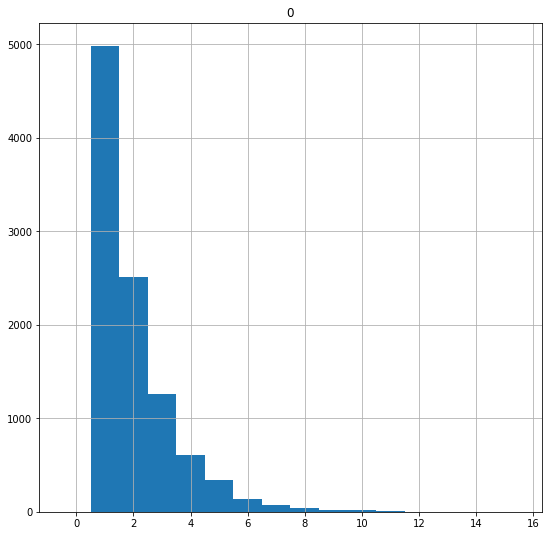

In [22]:
random.seed(12)

flips_till_heads = stats.geom.rvs(size=10000,  # Generate geometric data
                                  p=0.5)       # With success prob 0.5

# Print table of counts
print( pd.crosstab(index="counts", columns= flips_till_heads))

# Plot histogram
pd.DataFrame(flips_till_heads).hist(range=(-0.5,max(flips_till_heads)+0.5)
                                    , bins=max(flips_till_heads)+1);

col_0     1     2     3    4    5    6   7   8   9   10  11  12  13
row_0                                                              
counts  4995  2509  1245  635  304  159  77  38  15  13   8   1   1


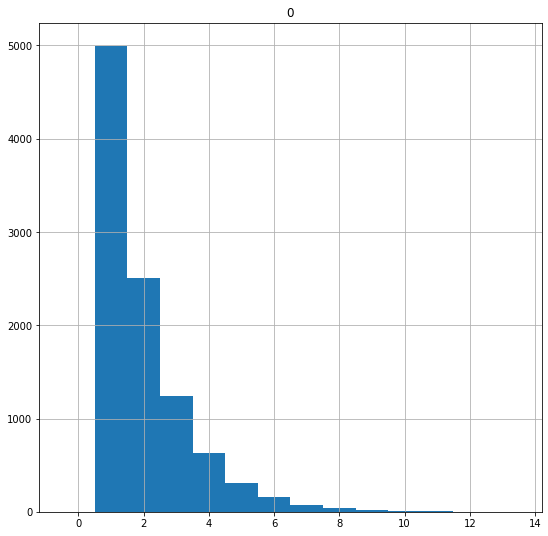

In [23]:
random.seed(12)

flips_till_heads = stats.geom.rvs(size=10000,  # Generate geometric data
                                  p=0.5)       # With success prob 0.5

# Print table of counts
print( pd.crosstab(index="counts", columns= flips_till_heads))

# Plot histogram
pd.DataFrame(flips_till_heads).hist(range=(-0.5,max(flips_till_heads)+0.5)
                                    , bins=max(flips_till_heads)+1);

In [25]:
first_five = stats.geom.cdf(k=5,   # Prob of success in first 5 flips
                           p=0.5)

1 - first_five

0.03125

Use pmf() to check the probability of seeing a specific number of flips before a successes:

In [26]:
stats.geom.pmf(k=2,   # Prob of needing exactly 2 flips to get first success
              p=0.5)

0.25

The scipy name for the exponential distribution is "expon". Let's investigate the exponential distribution:

In [27]:
# Get the probability of waiting more than 1 time unit before a success

prob_1 = stats.expon.cdf(x=1,        
                         scale=1)  # Arrival rate

1 - prob_1

0.36787944117144233

Let's plot this exponential distribution to get an idea of its shape:

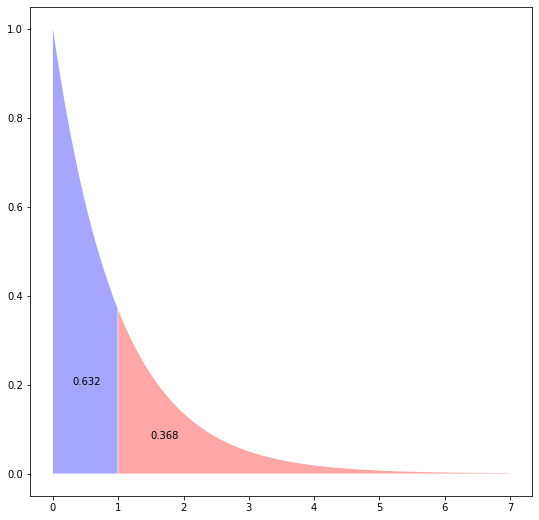

In [28]:
plt.fill_between(x=np.arange(0,1,0.01), 
                 y1= stats.expon.pdf(np.arange(0,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,7,0.01), 
                 y1= stats.expon.pdf(np.arange(1,7,0.01)) ,
                 facecolor='red',
                 alpha=0.35)


plt.text(x=0.3, y=0.2, s= round(prob_1,3))
plt.text(x=1.5, y=0.08, s= round(1 - prob_1,3));

The Poisson Distribution

col_0      0     1     2    3    4   5  6  7
row_0                                       
counts  3754  3593  1850  610  150  39  3  1


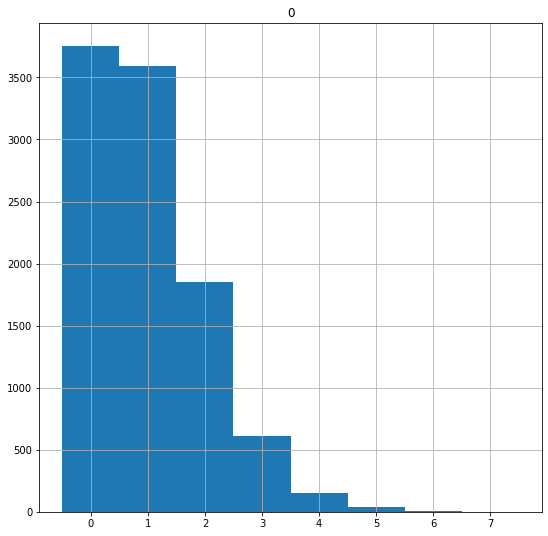

In [29]:
random.seed(12)

arrival_rate_1 = stats.poisson.rvs(size=10000,  # Generate Poisson data
                                   mu=1 )       # Average arrival time 1

# Print table of counts
print( pd.crosstab(index="counts", columns= arrival_rate_1))

# Plot histogram
pd.DataFrame(arrival_rate_1).hist(range=(-0.5,max(arrival_rate_1)+0.5)
                                    , bins=max(arrival_rate_1)+1);

col_0   0   1   2   3    4    5    6    7   ...   16   17  18  19  20  21  22  23
row_0                                       ...                                  
counts   2   5  24  86  223  361  643  874  ...  220  131  82  25  21   6   3   2

[1 rows x 24 columns]


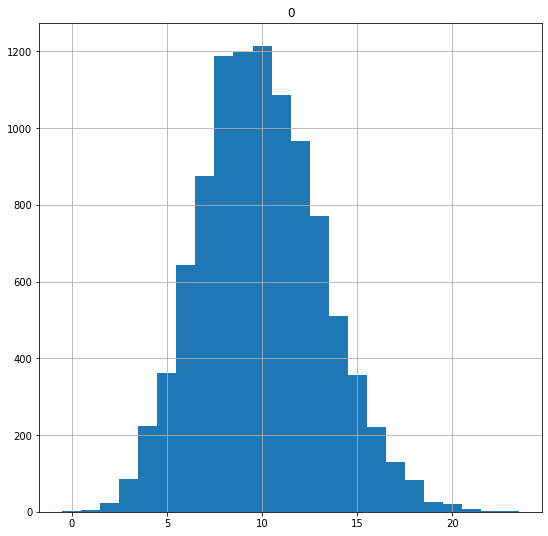

In [30]:
random.seed(12)

arrival_rate_10 = stats.poisson.rvs(size=10000,  # Generate Poisson data
                                   mu=10 )       # Average arrival time 10

# Print table of counts
print( pd.crosstab(index="counts", columns= arrival_rate_10))

# Plot histogram
pd.DataFrame(arrival_rate_10).hist(range=(-0.5,max(arrival_rate_10)+0.5)
                                    , bins=max(arrival_rate_10)+1);

As with other discrete probability distributions, we can use cdf() to check the probability of achieving more or less than a certain number of successes and pmf() to check the probability of obtaining a specific number of successes:

In [31]:
stats.poisson.cdf(k=5,     # Check the probability of 5 arrivals or less
                  mu=10)   # With arrival rate 10

0.06708596287903189

In [32]:
stats.poisson.cdf(k=5,     # Check the probability of 5 arrivals or less
                  mu=10)   # With arrival rate 10

0.06708596287903189